                                                         NAIVE BAYES                                                           

Naive Bayes is a supervised machine learning model used to solve classification problems.
Naive Bayes is a probabilistic model that assumes independence between features. It is a simple and
effective model that can be used for both binary and multi-class classification problems.

Construction of Naive Bayes:-

1. Understand Bayes' Theorem: Bayes' theorem provides a way to calculate the probability of a hypothesis (label) given some evidence (features). It's represented as:
 - P(Y|X) = P(X|Y).P(Y)/P(X)
where:
 - P(Y∣ X) is the posterior probability of class Y given predictor 𝑋,
 - P(X∣Y) is the likelihood of predictor 𝑋 given class Y,
 - P(Y) is the prior probability of class Y.
 - P(X) is the probability of predictor X (this term can be ignored in classification since it’s the same for all classes).

2. Assumption of Independence: Naive Bayes assumes that features are independent, so the probability of 𝑋 = (𝑋1,𝑋2,...,𝑋𝑛) given Y can be simplified as:
 - 𝑃(𝑋∣𝑌) = 𝑃(𝑋1∣𝑌)⋅𝑃(𝑋2∣𝑌)⋅…⋅𝑃(𝑋𝑛∣𝑌) 
This assumption makes the calculations easier.

3. Types of Naive Bayes: Naive Bayes classifiers come in different forms based on the data type:

- Gaussian Naive Bayes: Assumes continuous data follows a Gaussian (normal) distribution.
- Multinomial Naive Bayes: Used for discrete data (e.g., word counts in text classification).
- Bernoulli Naive Bayes: Used for binary/Boolean data (e.g., whether a word appears in a text or not).

4. Training the Classifier: 
- Calculate Priors P(Y): Compute the prior probability for each class by dividing the number of samples of that class by the total number of samples.
- Calculate Likelihoods P(Xi∣Y): For each feature 𝑋𝑖 and class Y, calculate the likelihood.
  - For Gaussian Naive Bayes, compute the mean and variance for each feature within each class.
  - For Multinomial and Bernoulli, calculate the probabilities for each feature given the class.

5. Prediction: To classify a new instance 
 - Calculate: P(Y∣ X) for each class Y.
 - Choose the class with the highest posterior probability.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn import metrics

In [4]:
raw_data = pd.read_csv(r"S:\VS code\python\Data _Analytics\Dataset\loan_data.csv")
raw_data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


Performing Data Transformation

In [5]:
raw_data.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [24]:
label_encoder = LabelEncoder()

labels = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
labeledDataset = raw_data
for label in labels:
    labeledDataset[label] = label_encoder.fit_transform(labeledDataset[label])

labeledDataset

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,0,47971.0,6,3,15000.0,3,15.66,0.31,3.0,645,0,1
44996,37.0,0,0,65800.0,17,3,9000.0,2,14.07,0.14,11.0,621,0,1
44997,33.0,1,0,56942.0,7,3,2771.0,0,10.02,0.05,10.0,668,0,1
44998,29.0,1,1,33164.0,4,3,12000.0,1,13.23,0.36,6.0,604,0,1


In [20]:
scaler = StandardScaler()
scaledDataset = scaler.fit_transform(labeledDataset)
scaledDataset_PD = pd.DataFrame(scaledDataset, columns=['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'])
scaledDataset_PD



,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,-0.953538,-1.110069,1.525264,-0.104090,-0.892284,0.904822,4.024953,0.852919,1.683039,4.016394,-0.739109,-1.419814,-1.016040,1.870829
1,-1.118963,-1.110069,0.849192,-0.846005,-0.892284,0.210609,-1.359209,-0.882904,0.044782,-0.684829,-0.996863,-2.549975,0.984213,-0.534522
2,-0.457264,-1.110069,0.849192,-0.844065,-0.397517,-1.177817,-0.646600,0.274312,0.625557,3.443074,-0.739109,0.047412,-1.016040,1.870829
3,-0.788113,-1.110069,-0.502953,-0.007039,-0.892284,0.904822,4.024953,0.274312,1.417829,3.443074,-0.996863,0.840507,-1.016040,1.870829
4,-0.622689,0.900845,1.525264,-0.176371,-0.727362,0.904822,4.024953,0.274312,1.095549,4.475050,-0.481354,-0.924130,-1.016040,1.870829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,-0.126414,0.900845,-1.179025,-0.402231,0.097249,0.904822,0.857799,0.274312,1.562184,1.952442,-0.739109,0.245686,-1.016040,1.870829
44996,1.527834,-1.110069,-1.179025,-0.180537,1.911393,0.904822,-0.092348,-0.304296,1.028407,0.003155,1.322928,-0.230171,-1.016040,1.870829
44997,0.866135,0.900845,-1.179025,-0.290681,0.262171,0.904822,-1.078758,-1.461512,-0.331212,-1.028821,1.065174,0.701716,-1.016040,1.870829
44998,0.204436,0.900845,-0.502953,-0.586348,-0.232595,0.904822,0.382726,-0.882904,0.746412,2.525762,0.034155,-0.567237,-1.016040,1.870829


Performing Stastical analysis

In [25]:
labeledDataset.notnull().count()

person_age                        45000
person_gender                     45000
person_education                  45000
person_income                     45000
person_emp_exp                    45000
person_home_ownership             45000
loan_amnt                         45000
loan_intent                       45000
loan_int_rate                     45000
loan_percent_income               45000
cb_person_cred_hist_length        45000
credit_score                      45000
previous_loan_defaults_on_file    45000
loan_status                       45000
dtype: int64

In [26]:
labeledDataset.shape

(45000, 14)

In [27]:
labeledDataset.describe()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
count,45000.000000,45000.000000,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,0.552022,1.743933,8.031905e+04,5.410333,1.696622,9583.157556,2.525911,11.006606,0.139725,5.867489,632.608756,0.507956,0.222222
std,6.045108,0.497292,1.479148,8.042250e+04,6.063532,1.440497,6314.886691,1.728305,2.978808,0.087212,3.879702,50.435865,0.499942,0.415744
min,20.000000,0.000000,0.000000,8.000000e+03,0.000000,0.000000,500.000000,0.000000,5.420000,0.000000,2.000000,390.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000,4.720400e+04,1.000000,0.000000,5000.000000,1.000000,8.590000,0.070000,3.000000,601.000000,0.000000,0.000000
50%,26.000000,1.000000,1.000000,6.704800e+04,4.000000,3.000000,8000.000000,3.000000,11.010000,0.120000,4.000000,640.000000,1.000000,0.000000
75%,30.000000,1.000000,3.000000,9.578925e+04,8.000000,3.000000,12237.250000,4.000000,12.990000,0.190000,8.000000,670.000000,1.000000,0.000000
max,144.000000,1.000000,4.000000,7.200766e+06,125.000000,3.000000,35000.000000,5.000000,20.000000,0.660000,30.000000,850.000000,1.000000,1.000000


Performing Visualization

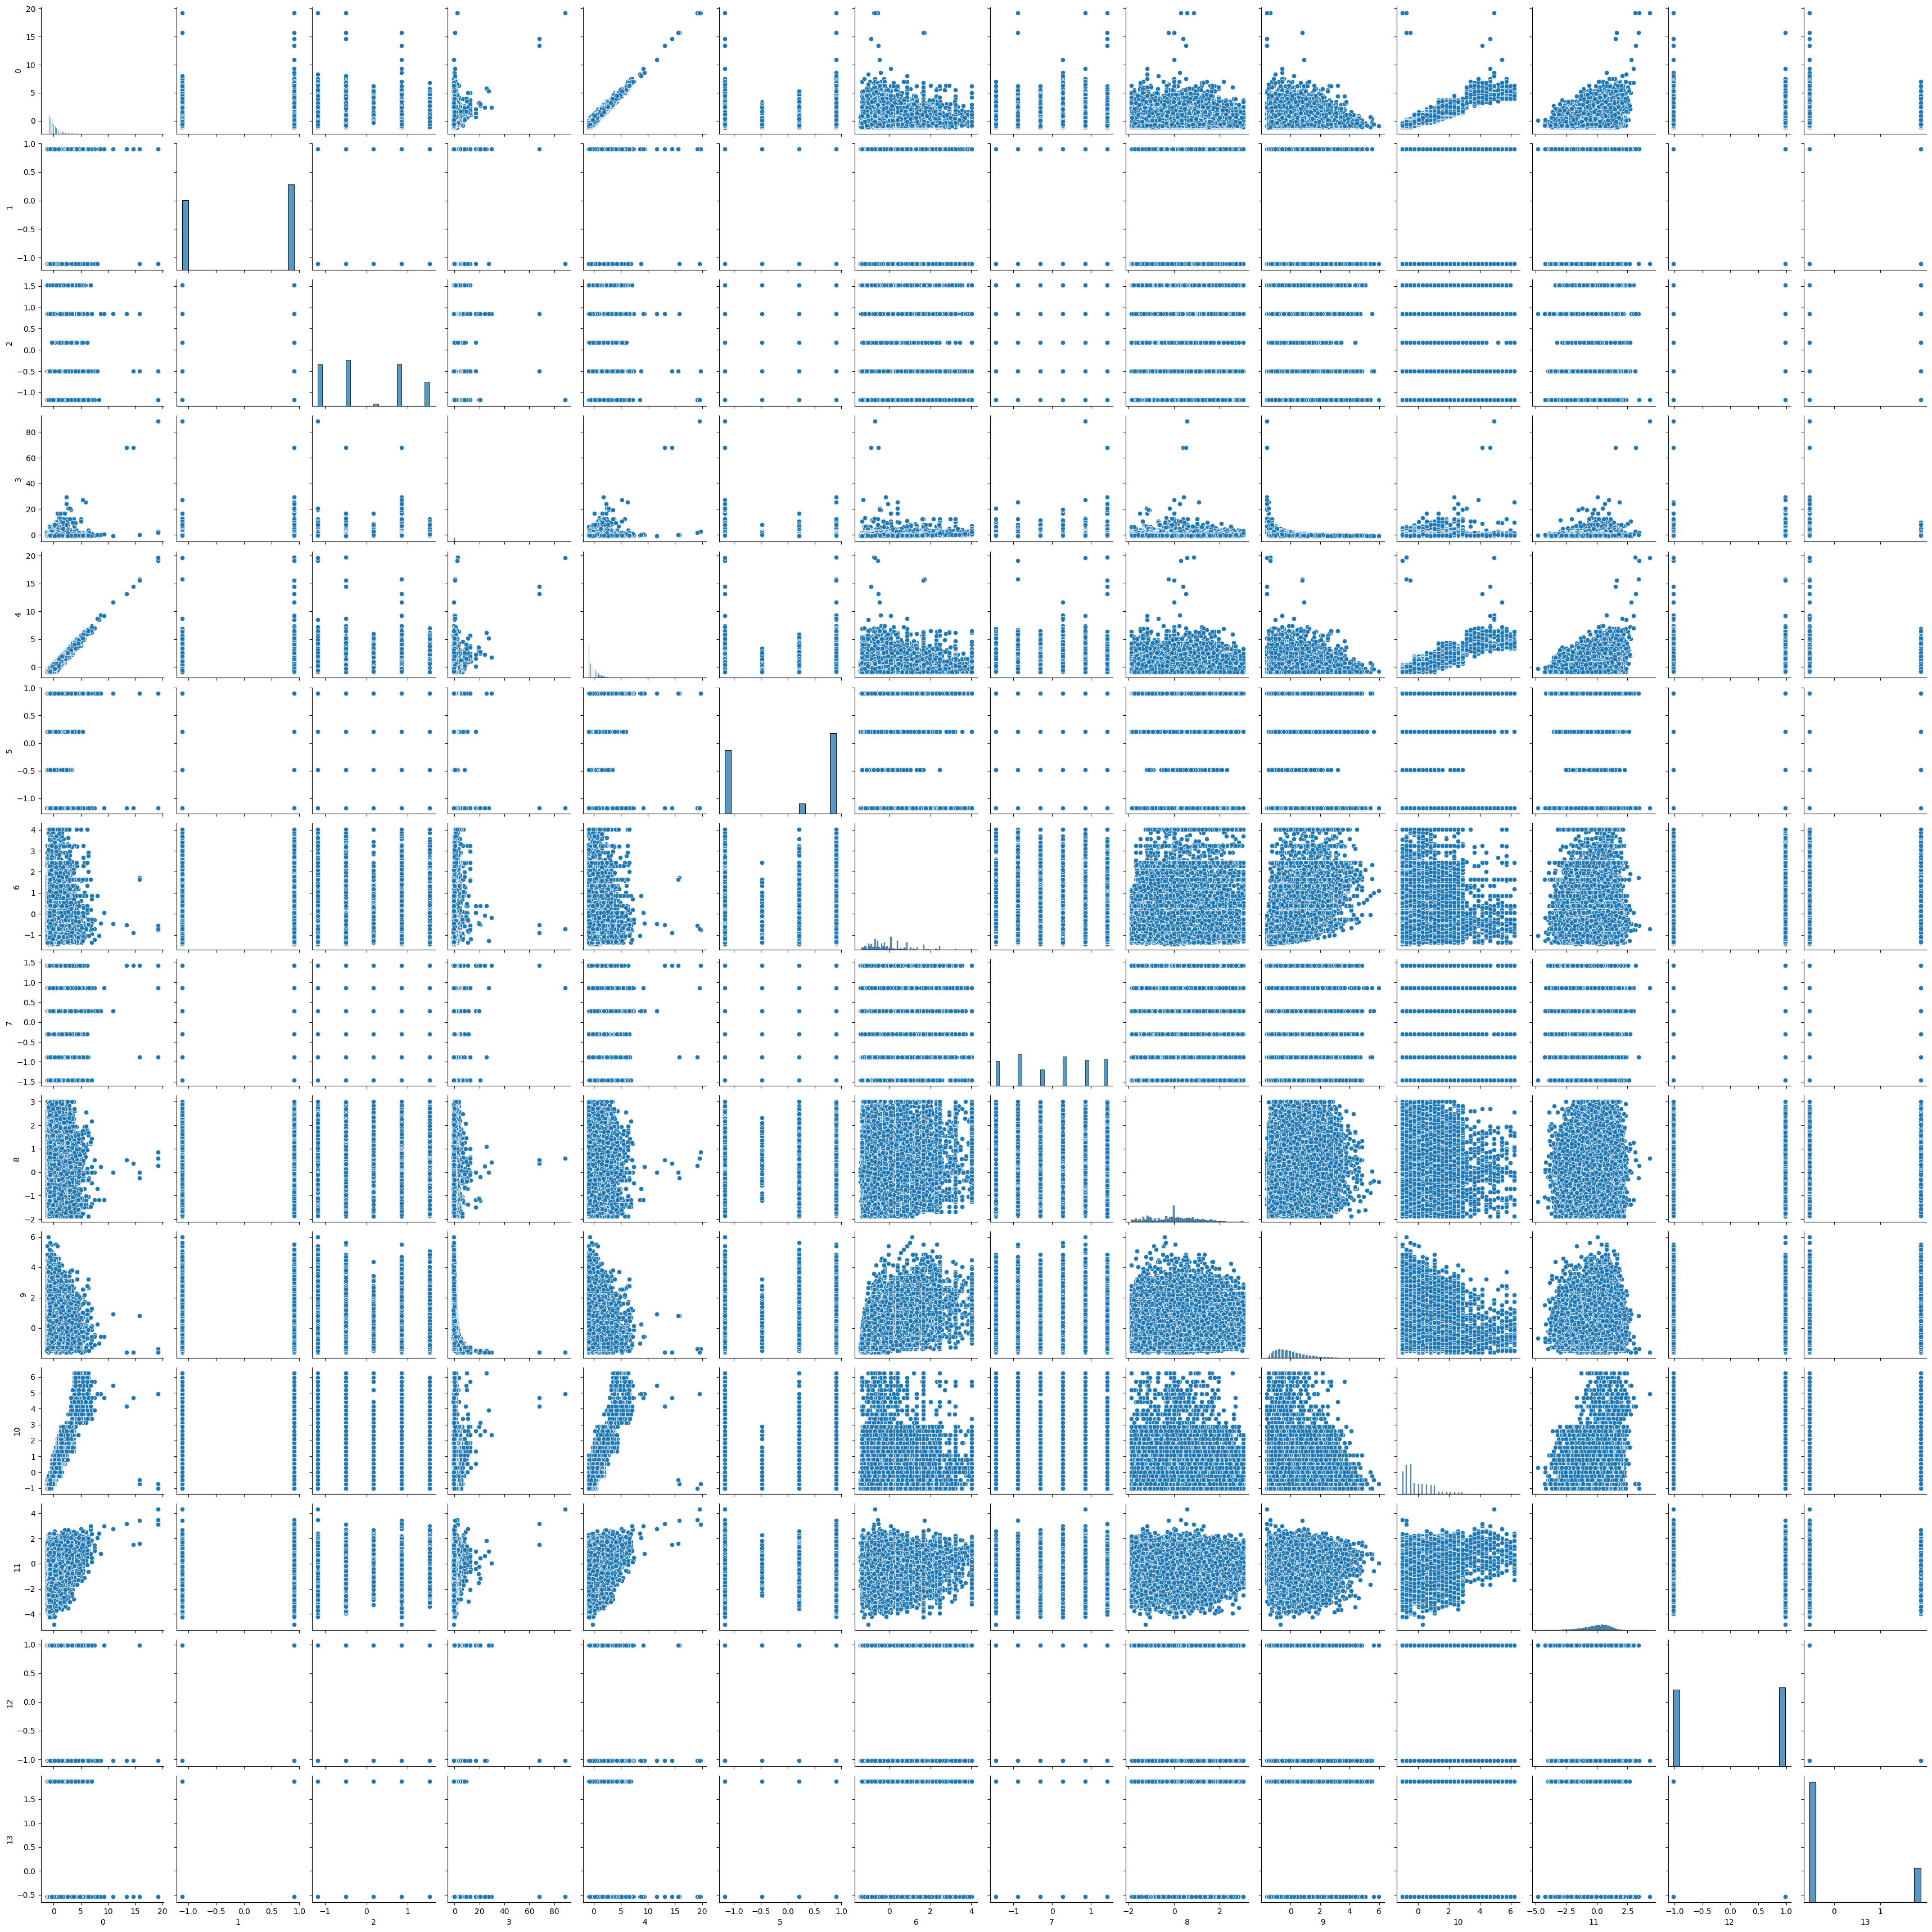

In [ ]:
sns.pairplot(labeledDataset)

Making Naive bayes Model

In [28]:
x = labeledDataset.iloc[:, :-1]
y = labeledDataset['loan_status']

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8)

In [30]:
Gaussian_NaiveBayes = GaussianNB()
Gaussian_NaiveBayes.fit(x_train, y_train)

GaussianNB()

In [34]:
Multinomial_NaiveBayes = MultinomialNB()
Multinomial_NaiveBayes.fit(x_train, y_train)

MultinomialNB()

In [35]:
Bernoulli_NaiveBayes = BernoulliNB()
Bernoulli_NaiveBayes.fit(x_train, y_train)

BernoulliNB()

In [42]:
predections_1 = Gaussian_NaiveBayes.predict(x_test)
predections_1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
predections_2 = Multinomial_NaiveBayes.predict(x_test)
predections_2

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [44]:
predections_3 = Bernoulli_NaiveBayes.predict(x_test)
predections_3

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
y_test

31117    0
35613    0
42984    1
34034    0
21846    0
        ..
24304    0
23295    0
29053    0
13369    0
36935    0
Name: loan_status, Length: 36000, dtype: int64

Metrics Evaluation

In [45]:
print("Accuracy (Gaussian_NaiveBayes): ",metrics.accuracy_score(y_test, predections_1))
print("Accuracy (Multinomial_NaiveBayes): ",metrics.accuracy_score(y_test, predections_2))
print("Accuracy (Bernoulli_NaiveBayes): ",metrics.accuracy_score(y_test, predections_3))

Accuracy (Gaussian_NaiveBayes):  0.8152222222222222
Accuracy (Multinomial_NaiveBayes):  0.6596666666666666
Accuracy (Bernoulli_NaiveBayes):  0.8045833333333333
